In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [3]:
# 1. Use a função read_csv para carregar corretamente o arquivo
df = pd.read_csv("dados_1997_2011_paises_csv.csv", sep=";", encoding="latin1", decimal=",")
df.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215


In [4]:
#2. Criar a seguinte função znorm
def znorm(x: np.ndarray) -> np.ndarray:
    return (x - min(x))  / (max(x) - min(x))

In [23]:
#3. Use a função znorm() nas colunas população e pib. Criar as colunas z_pop e z_pib
# df[["z_pop", "z_pib"]] = df[["populacao", "pib"]].apply(lambda x: znorm(x))
df["z_pop"] = znorm(df["populacao"])
df["z_pib"] = znorm(df["pib"])
df.head()

,pais,ano,idh,corrupcao_indice,competitividade_indice,globalizacao_indice,pib,populacao,z_pop,z_pib
0,África do Sul,1997,0.6328,56,44.54,52.60298,148814151.0,43353.632,0.029461,0.010181
1,África do Sul,1998,0.6272,57,31.11,54.51911,134295557.0,43961.924,0.029914,0.009186
2,África do Sul,1999,0.6216,50,43.90,61.04379,133183581.0,44526.272,0.030334,0.009109
3,África do Sul,2000,0.6160,52,51.52,62.47182,132877648.0,45064.098,0.030735,0.009088
4,África do Sul,2001,0.6126,50,45.12,62.04144,118478979.0,45576.215,0.031116,0.008101


In [38]:
#4 Selecionar os países de IDH maior que 0.9 em 2008.
df[["pais", "idh", "ano"]].query("idh > 0.9 and ano == 2008")

,pais,idh,ano
26,Alemanha,0.902,2008
41,Austrália,0.924,2008
86,Canadá,0.903,2008
161,Estados Unidos,0.907,2008
191,Holanda,0.904,2008


In [7]:
#5 Obter o IDH médio dos países e ordenar do maior para o menor (dica: usar função groupby)
df.groupby('pais').agg(idh_medio = pd.NamedAgg('idh', 'mean')).sort_values(by="idh_medio", ascending=False)

,idh_medio
pais,
Austrália,0.914507
Estados Unidos,0.900947
Holanda,0.891320
Canadá,0.890480
Alemanha,0.882880
Japão,0.881360
Bélgica,0.876107
França,0.861773
Coréia,0.856907


/tmp/ipykernel_20271/4065916197.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x='pais', y='df_corrupcao_media', data=df_corrupcao_media, palette='Blues_d')


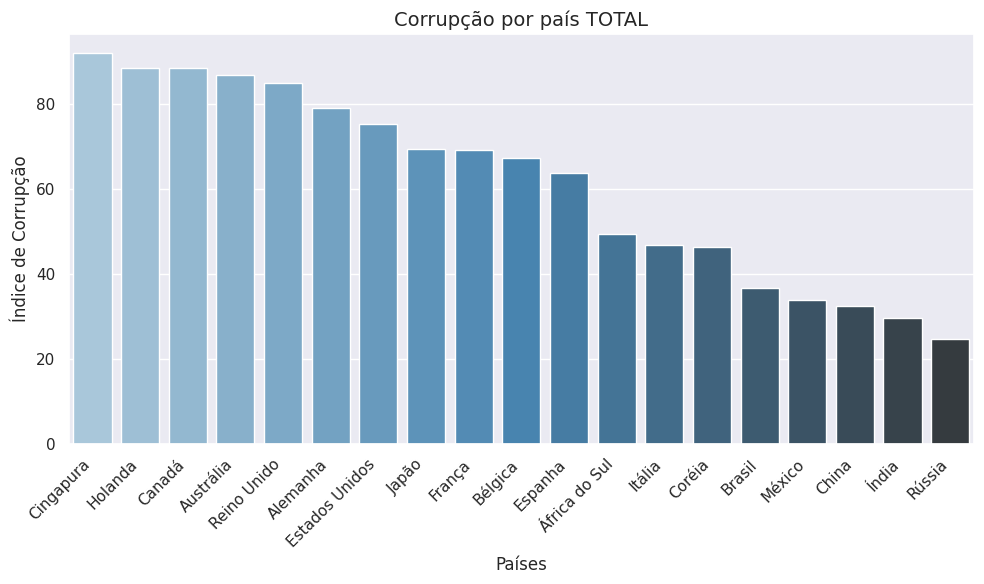

In [28]:
# 6
# Construa um gráfico ordenando os países por corrupção 
# (Dica, pode-se tanto filtrar um ano específico ou fazer uma média de todos os anos).
df_corrupcao_media = df.groupby('pais').agg(df_corrupcao_media = pd.NamedAgg('corrupcao_indice', 'mean')).sort_values(by="df_corrupcao_media", ascending=False)

sns.set_style("darkgrid")
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='pais', y='df_corrupcao_media', data=df_corrupcao_media, palette='Blues_d')
plt.xlabel("Países", fontsize=12)
plt.ylabel("Índice de Corrupção", fontsize=12)
plt.title("Corrupção por país TOTAL", fontsize=14)

plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Exibindo o gráfico
plt.show()

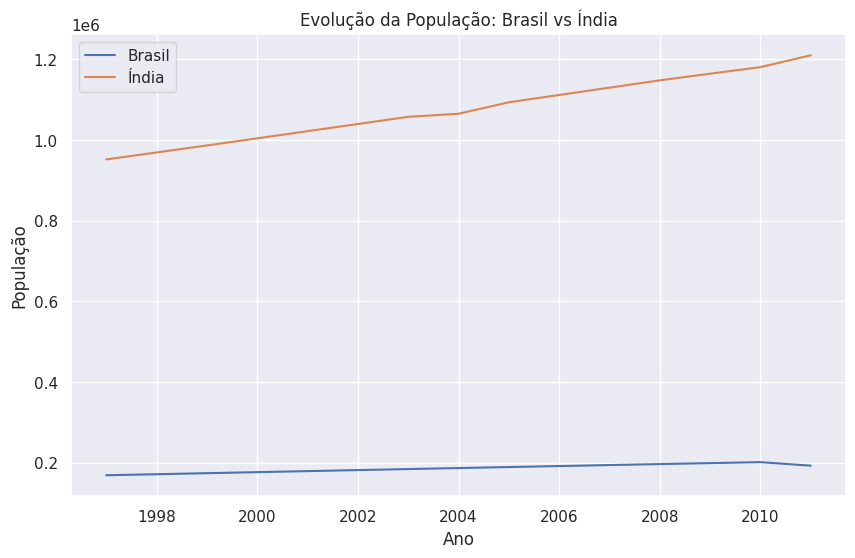

In [29]:
#7
# Construa um gráfico que compara a evolução das populações de Brasil e Índia.
df_brasil = df.query("pais == 'Brasil'")
df_india = df.query("pais == 'Índia'")

sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))

sns.lineplot(data=df_brasil, x='ano', y='populacao', label='Brasil')
sns.lineplot(data=df_india, x='ano', y='populacao', label='Índia')

plt.title('Evolução da População: Brasil vs Índia')
plt.xlabel('Ano')
plt.ylabel('População')

plt.show()

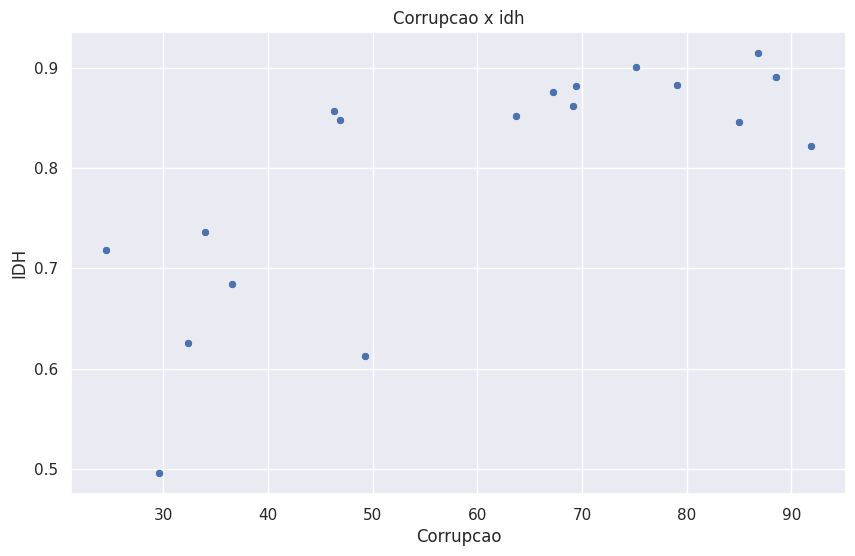

In [39]:
#8 
# Construa um gráfico com IDH médio no eixo y e corrupção média no eixo x. O que você consegue entender deste resultado?
df_media = df.groupby('pais').agg(df_corrupcao_media = pd.NamedAgg('corrupcao_indice', 'mean'), idh_medio = pd.NamedAgg('idh', 'mean'))
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_media, x='df_corrupcao_media', y='idh_medio')

plt.title('Corrupcao x idh')
plt.xlabel('Corrupcao')
plt.ylabel('IDH')

plt.show()